In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video

plt.style.use(r"C:\Users\B30724\Documents\Python\presentation.mplstyle")
plt.rcParams["animation.html"] = "jshtml"

In [36]:
%matplotlib notebook

## Input parameters
x = np.linspace(0,10,51)
params = dict(
    wavelength = 5.0,
    c = 0.5,  # Phase velocity
    dt = 100,  # Time interval between two frames in milisecond
)
def propagate_wave(x, n, wavelength=1.0, c=1.0, dt=100):
    k = 2*np.pi / wavelength  # Wavenumber
    omega = 2*np.pi*c / wavelength  # Angular frequency
    y = np.cos(k*x - omega*n*dt/1000)
    return y

y = propagate_wave(x, 0, **params)

## Set up the figure, axis, and fixed plot elements
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
markerline, stemlines, baseline = ax.stem(x, y, linefmt=None, markerfmt='o', basefmt='none')
markerline.set_markersize(5)
ax.set(xlabel="X", ylabel="Amplitude")
fig.tight_layout()

## Animation function (called sequentially)
def update(n):
    new_y = propagate_wave(x, n, **params)
    markerline.set_ydata(new_y)
    stemlines.set_paths([[(xi, 0), (xi, yi)] for xi, yi in zip(x, new_y)])
    return markerline, stemlines

## Call the animator
## frames: source of data passed to func at each frame of the animation
## interval: delay between frames in milliseconds
## blit=True means only re-draw the parts that have changed
# anim = \
animation.FuncAnimation(fig, update, frames=100, interval=100,
                        repeat=False, blit=True)  # 10s animation in total
# anim.save("./traveling_wave.gif", writer='pillow')
# filename = "./traveling_wave.mp4"
# anim.save(filename, writer='ffmpeg', fps=40)
# Video(filename)

<IPython.core.display.Javascript object>

In [37]:
%matplotlib notebook

## Input parameters
x = np.linspace(0,10,51)
color = plt.cm.hsv(np.linspace(0,1,len(x)))
params = dict(
    wavelength = 5.0,
    c = 0.5,  # Phase velocity
    dt = 100,  # Time interval between two frames in milisecond
)
def propagate_phase(x, n, wavelength=1.0, c=1.0, dt=100):
    k = 2*np.pi / wavelength  # Wavenumber
    omega = 2*np.pi*c / wavelength  # Angular frequency
    phase = k*x - omega*n*dt/1000
    return np.divmod(phase, 2*np.pi)[1]  # Return values in the range [0, 2*pi)

phase = propagate_phase(x, 0, **params)
color = plt.cm.hsv(phase/(2*np.pi))

## Set up the figure, axis, and fixed plot elements
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
scat = ax.scatter(x, np.ones_like(x), c=color)
ax.set(xlabel="X", ylabel="Magnitude")
ax.set(ylim=[0,1.1])
fig.tight_layout()

## Animation function (called sequentially)
def update(n):
    new_phase = propagate_phase(x, n, **params)
    new_color = plt.cm.hsv(new_phase/(2*np.pi))
    scat.set_color(new_color)
    return scat,

## Call the animator
## frames: source of data passed to func at each frame of the animation
## interval: delay between frames in milliseconds
## blit=True means only re-draw the parts that have changed
# anim = \
animation.FuncAnimation(fig, update, frames=100, interval=100,
                        repeat=False, blit=True)  # 10s animation in total
# anim.save("./traveling_phase.gif", writer='pillow')
# filename = "./traveling_phase.mp4"
# anim.save(filename, writer='ffmpeg', fps=40)
# Video(filename)

<IPython.core.display.Javascript object>

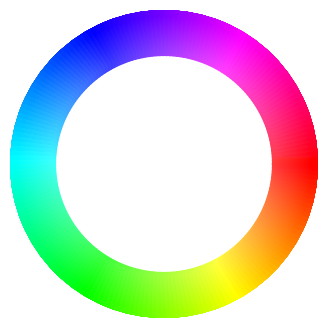

In [44]:
%matplotlib inline
import colorsys

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='polar')

rho = np.linspace(0.75, 1, 50)  # Radius of 1, distance from center to outer edge, empty for 0 to 0.75
phi = np.linspace(0, 2*np.pi, 200)  # in radians, one full circle

RHO, PHI = np.meshgrid(rho, phi) # get every combination of rho and phi

h = (PHI-PHI.min()) / (PHI.max()-PHI.min()) # Use angle to determine hue, normalized to 0-1
h = np.flip(h)        
s = RHO               # Saturation is set as a function of radias
v = np.ones_like(RHO) # Value is constant

# Convert the np arrays to lists. This actually speeds up the colorsys call
h,s,v = h.flatten().tolist(), s.flatten().tolist(), v.flatten().tolist()
c = [colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)]
c = np.array(c)

ax.scatter(PHI, RHO, c=c)
ax.axis('off');